In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Reshape
 

In [2]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
len(np.unique(y_train))

10

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
x_train=x_train.astype("float32")
y_train=y_train.astype("float32")
x_test=x_test.astype("float32")
y_test=y_test.astype("float32")

In [9]:
x_train.dtype

dtype('float32')

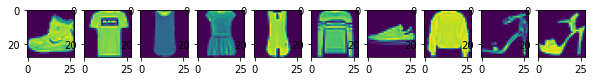

[9. 0. 0. 3. 0. 2. 7. 2. 5. 5.]


In [10]:
plt.figure(figsize=(10,10))
for i in range(0,10):
  plt.subplot(1,10,i+1)
  plt.imshow(x_train[i])
plt.show()

print(y_train[0:10])

In [11]:
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [17]:
tf.keras.backend.clear_session()
model=Sequential()

model.add(Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Dense(500))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

model.add(Dense(300))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

model.add(Dense(100))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

model.add(Dense(50))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.BatchNormalization())

model.add(Dense(10,activation="softmax"))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 500)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 500)               2000      
_________________________________________________________________
dense_1 (Dense)              (None, 300)               150300    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 300)               0

In [18]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 10ms/step - loss: 0.4952 - accuracy: 0.8223 - val_loss: 0.4197 - val_accuracy: 0.8518
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3967 - accuracy: 0.8554 - val_loss: 0.4219 - val_accuracy: 0.8484
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3667 - accuracy: 0.8661 - val_loss: 0.3842 - val_accuracy: 0.8674
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3429 - accuracy: 0.8735 - val_loss: 0.3687 - val_accuracy: 0.8721
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3252 - accuracy: 0.8795 - val_loss: 0.3627 - val_accuracy: 0.8755
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3096 - accuracy: 0.8861 - val_loss: 0.3705 - val_accuracy: 0.8787
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2925 - accuracy: 0.8911 - val_loss: 0.3497 - va

In [20]:
y_pred=model.predict(x_test)
y_pred

array([[8.3868338e-07, 2.2832820e-07, 1.1940563e-06, ..., 6.8026916e-03,
        1.4583422e-05, 9.8466229e-01],
       [2.7056006e-04, 6.9812934e-08, 9.9264091e-01, ..., 1.1939119e-08,
        4.6035993e-09, 3.6977343e-09],
       [1.6428090e-05, 9.9996448e-01, 9.4575306e-08, ..., 1.1337783e-06,
        3.8168396e-06, 4.8187196e-08],
       ...,
       [1.2096969e-04, 5.0875520e-10, 7.9217016e-06, ..., 1.9201641e-06,
        9.9983346e-01, 5.9686090e-07],
       [2.3678799e-06, 9.9994314e-01, 1.0186533e-06, ..., 9.1496111e-07,
        1.9704801e-06, 9.7974794e-07],
       [1.0718511e-06, 5.7916566e-07, 1.1896052e-05, ..., 1.1085564e-02,
        6.0739562e-06, 1.8948884e-04]], dtype=float32)

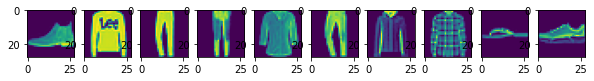

Actual values:  [9, 2, 1, 1, 6, 1, 4, 6, 5, 7]
Predicted values:  [9, 2, 1, 1, 6, 1, 4, 6, 5, 7]


In [28]:
actual_values=[]
pred_values=[]
plt.figure(figsize=(10,10))
for i in range(0,10):
  plt.subplot(1,10,i+1)
  plt.imshow(x_test[i])
  actual_values.append(np.argmax(y_test[i]))
  pred_values.append(np.argmax(y_test[i]))
plt.show()
print("Actual values: ",actual_values)
print("Predicted values: ",pred_values)